# Load Patterning & Envelopes

This notebook demonstrates the use of `PyCBA` for constructing load effect envelopes from patterned loading. The `LoadPattern` class is used to calculate the design envelopes from load patterning dead and live loads. The load factors corresponding to the maximum and minimum values of the nominal loads are supplied, along with the "load matrices" for dead and live load.

In [1]:
import pycba as cba
import numpy as np
import matplotlib.pyplot as plt

## Example 1: Hulse & Mosley
Here we consider a 3-span beam from Hulse & Mosley, *Reinforced Concrete Design By Computer* (1986) which uses the load pattern from the (now superseded) British Standards:
- MAX = 1.4 Gk + 1.6 Qk 
- MIN = 1.0 Gk
The beam is subjected to nominal dead and live UDLs of $w_g = 25$ kN/m and $w_q = 10$ kN/m respectively.

First establish the beam as usual:

In [2]:
L = [6,4,6]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

Now set the dead load matrix and maximum and minimum load factors:

In [3]:
LMg = [[1,1,25,0,0],
       [2,1,25,0,0],
       [3,1,25,0,0]]
γg_max = 1.4
γg_min = 1.0

And the same for the live load:

In [4]:
LMq = [[1,1,10,0,0],
       [2,1,10,0,0],
       [3,1,10,0,0]]
γq_max = 1.6
γq_min = 0

Now create the `LoadPattern` object by passing the `BeamAnalysis` object. Assign the dead and live load information and then analyze and plot.

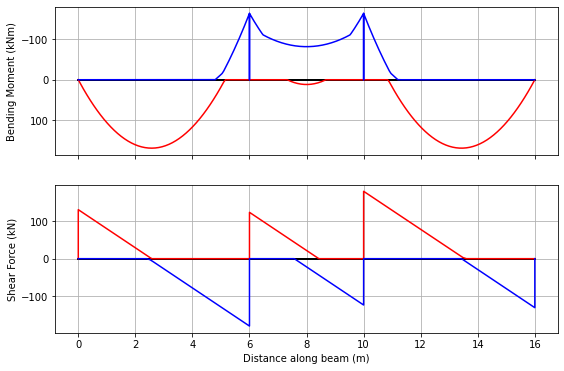

In [5]:
lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env = lp.analyze()
env.plot(figsize=(9,6));

And let's confirm that the results match the book (Section 2.3.6) to the second decimal place (`atol=1e-2`). To do this, we find the results from our analysis for key locations for moments and shears and confirm they match the book. First, the moments:

In [6]:
m_locs = np.array([3, 6, 8, 10, 13])
idx = [(np.abs(env.x - x)).argmin() for x in m_locs]
mmx = np.allclose(env.Mmax[idx],np.array([163.79, 0, 11.75, 0, 163.79]),atol=1e-2)
mmn = np.allclose(env.Mmin[idx],np.array([0, -163.38, -81.42, -163.38, 0]),atol=1e-2)
print(mmx,mmn)

True True


The shear is a little more complex because of the way load effects are calculated along the beam. For $n$ points requested (e.g. 100), there are nominally $n+1$ points to include the start and end. However, because we also want to 'close' the shear force diagram (see above), we include two more duplicated points at the end, so there are $n+3$ points per span; and we want to extract the maximum and minium shear forces along each span, and not including these end points.

In [7]:
n = beam_analysis.beam_results.npts
nspans = beam_analysis.beam.no_spans
Vmax = np.array([np.max(env.Vmax[i*(n+3):(i+1)*(n+3)]) for i in range(nspans)])
vmx = np.allclose(Vmax,np.array([131.1, 123.94, 180.23]),atol=1e-2)
Vmin = np.array([np.min(env.Vmin[i*(n+3):(i+1)*(n+3)]) for i in range(nspans)])
vmn = np.allclose(Vmin,np.array([-180.23, -123.94, -131.10]),atol=1e-2)
print(vmx,vmn)

True True


## Example 2: 5-span Beam
In this example we use Eurocode load factors for which the load pattern is
- MAX = 1.35 Gk + 1.5Qk 
- MIN = 0.9 Gk

Make the beam as before:

In [8]:
L = [6.5,8.3,8.3,8.3,6.5]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

And define the loads:

In [9]:
LMg = [[1,1,10.3,0,0],
       [2,1,10.3,0,0],
       [3,1,10.3,0,0],
       [4,1,10.3,0,0],
       [5,1,10.3,0,0]]
γg_max = 1.35
γg_min = 0.9

LMq = [[1,1,12.5,0,0],
       [2,1,12.5,0,0],
       [3,1,12.5,0,0],
       [4,1,12.5,0,0],
       [5,1,12.5,0,0]]
γq_max = 1.5
γq_min = 0

And now automatically pattern as before. However, in this case, we desire to calculate the load effects at 200 pts along each span.

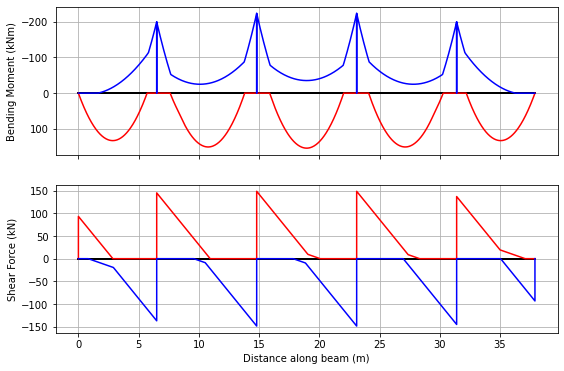

In [10]:
lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env = lp.analyze(npts=200)
env.plot(figsize=(9,6));

## Example 3: 4-Span Beam
Here we consider a 4-span beam subjec to nominal dead and live UDLs of $w_g = 20$ kN/m and $w_q = 30$ kN/m respectively. Here we use a modified load pattern from the old British Standards, conservatively allowing dead load to be less than the nominal estimate: 
- MAX = 1.4 Gk + 1.6 Qk 
- MIN = 0.9 Gk

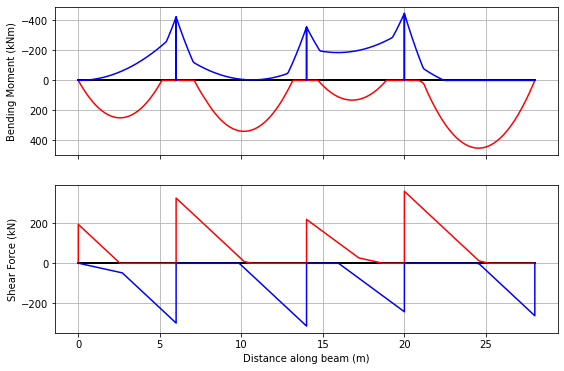

In [11]:
L = [6,8,6,8]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

LMg = [[1,1,20,0,0],
       [2,1,20,0,0],
       [3,1,20,0,0],
       [4,1,20,0,0]]
γg_max = 1.4
γg_min = 0.9

LMq = [[1,1,30,0,0],
       [2,1,30,0,0],
       [3,1,20,0,0],
       [4,1,30,0,0]]
γq_max = 1.6
γq_min = 0

lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env = lp.analyze()
env.plot(figsize=(9,6));